In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report

In [68]:
Data = pd.read_csv("C:\\Users\\Asus\\Documents\\DATA SETS\\CSV DATA SETS\\donor.csv")

In [69]:
df = pd.DataFrame(Data)

In [70]:
df.head()

,donor_id,name,email,password,contact_number,city,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated,created_at
0,1b8b4c828a,Norma Fisher,ysullivan@yahoo.com,P5hX6Syg*A,+61 461706749,Hobart,A+,No,65,31,62,2017-03-17
1,a6a3f7fe55,Eugene Bowman,hramos@brown-sellers.com,b6Wq6Cqz@5,+61 450709944,Darwin,AB-,Yes,64,8,16,2016-11-11
2,cee6478144,Sheri Bolton DDS,jasmine85@hotmail.com,$9RB51m#s7,+61 428756361,Melbourne,AB+,Yes,39,6,6,2022-02-25
3,5986bc55f9,Kelly Boyd,pattylawrence@riley-hayes.com,@5Tdg(4kCm,+61 454318320,Darwin,A-,No,55,20,20,2025-04-04
4,93246afe6c,Taylor Guzman,martinezjacob@wilson.com,x!)9Ag@J*7,+61 484158472,Darwin,O-,No,7,35,35,2022-11-30


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   donor_id                     10000 non-null  object
 1   name                         10000 non-null  object
 2   email                        10000 non-null  object
 3   password                     10000 non-null  object
 4   contact_number               10000 non-null  object
 5   city                         10000 non-null  object
 6   blood_group                  10000 non-null  object
 7   availability                 10000 non-null  object
 8   months_since_first_donation  10000 non-null  int64 
 9   number_of_donation           10000 non-null  int64 
 10  pints_donated                10000 non-null  int64 
 11  created_at                   10000 non-null  object
dtypes: int64(3), object(9)
memory usage: 937.6+ KB


In [72]:
df.describe()

,months_since_first_donation,number_of_donation,pints_donated
count,10000.000000,10000.000000,10000.000000
mean,59.953100,25.128200,37.614000
std,34.911379,14.654195,26.334072
min,0.000000,0.000000,0.000000
25%,30.000000,12.000000,16.000000
50%,60.000000,26.000000,34.000000
75%,90.000000,38.000000,50.000000
max,120.000000,50.000000,100.000000


In [74]:
df.isnull().sum()

donor_id                       0
name                           0
email                          0
password                       0
contact_number                 0
city                           0
blood_group                    0
availability                   0
months_since_first_donation    0
number_of_donation             0
pints_donated                  0
created_at                     0
dtype: int64

In [75]:
df["created_at"]=pd.to_datetime(df["created_at"])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   donor_id                     10000 non-null  object        
 1   name                         10000 non-null  object        
 2   email                        10000 non-null  object        
 3   password                     10000 non-null  object        
 4   contact_number               10000 non-null  object        
 5   city                         10000 non-null  object        
 6   blood_group                  10000 non-null  object        
 7   availability                 10000 non-null  object        
 8   months_since_first_donation  10000 non-null  int64         
 9   number_of_donation           10000 non-null  int64         
 10  pints_donated                10000 non-null  int64         
 11  created_at                   10000 non-nul

In [78]:
df.drop(columns=["donor_id","name","email","password","contact_number","city"])

,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated,created_at
0,A+,No,65,31,62,2017-03-17
1,AB-,Yes,64,8,16,2016-11-11
2,AB+,Yes,39,6,6,2022-02-25
3,A-,No,55,20,20,2025-04-04
4,O-,No,7,35,35,2022-11-30
...,...,...,...,...,...,...
9995,A+,Yes,66,42,42,2019-02-11
9996,O-,No,65,14,28,2025-02-18
9997,B+,No,57,16,32,2019-04-29
9998,AB-,Yes,79,23,46,2022-08-23


In [83]:
import seaborn as sns

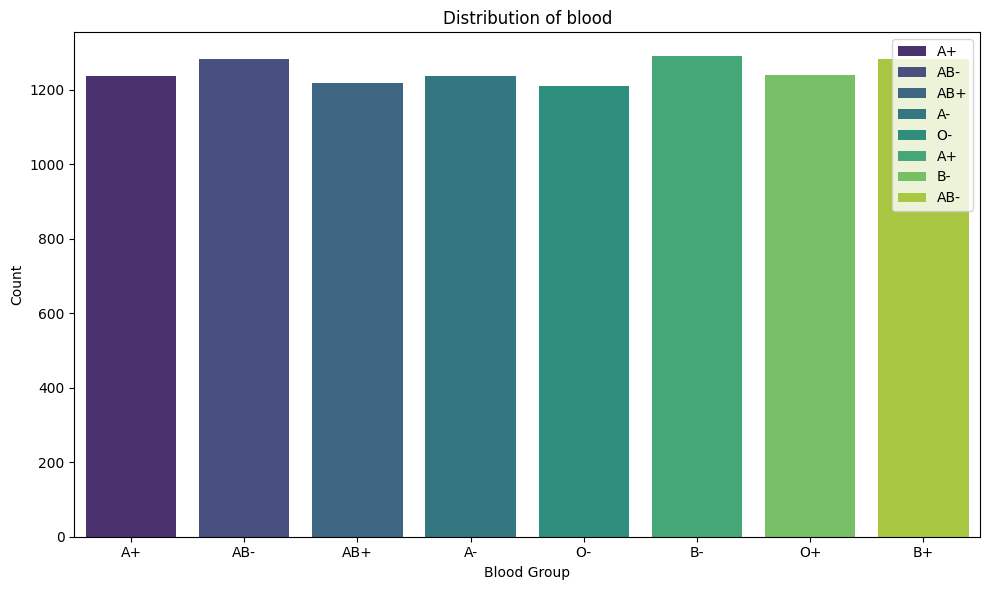

In [100]:
#Distribution of blood group visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df , x="blood_group",palette='viridis' , hue="blood_group")
plt.title("Distribution of blood")
plt.ylabel("Count")
plt.xlabel("Blood Group")
plt.legend(df["blood_group"])
plt.tight_layout()

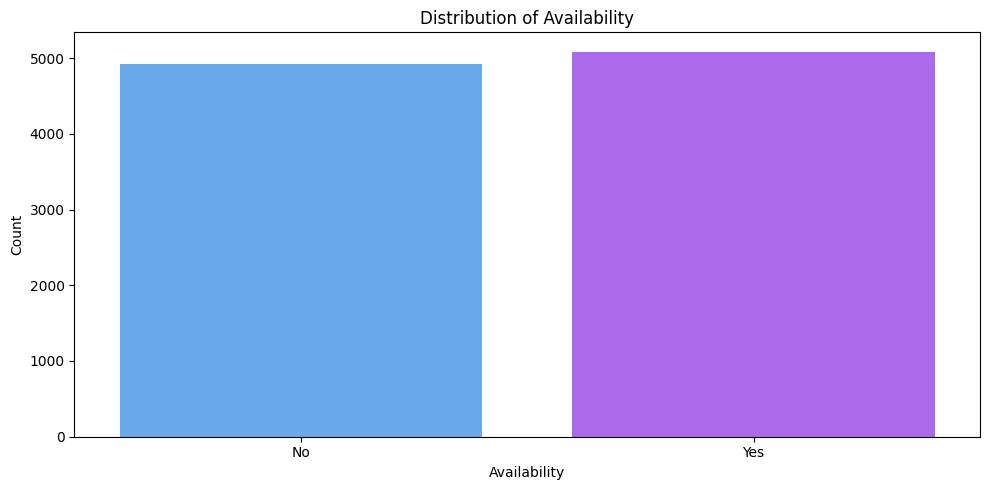

In [114]:
plt.figure(figsize=(10,5))
sns.countplot(data=df , x="availability" , palette="cool", hue="availability")
plt.title("Distribution of Availability")
plt.xlabel("Availability")
plt.ylabel("Count")
plt.tight_layout()

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   donor_id                     10000 non-null  object        
 1   name                         10000 non-null  object        
 2   email                        10000 non-null  object        
 3   password                     10000 non-null  object        
 4   contact_number               10000 non-null  object        
 5   city                         10000 non-null  object        
 6   blood_group                  10000 non-null  object        
 7   availability                 10000 non-null  object        
 8   months_since_first_donation  10000 non-null  int64         
 9   number_of_donation           10000 non-null  int64         
 10  pints_donated                10000 non-null  int64         
 11  created_at                   10000 non-nul

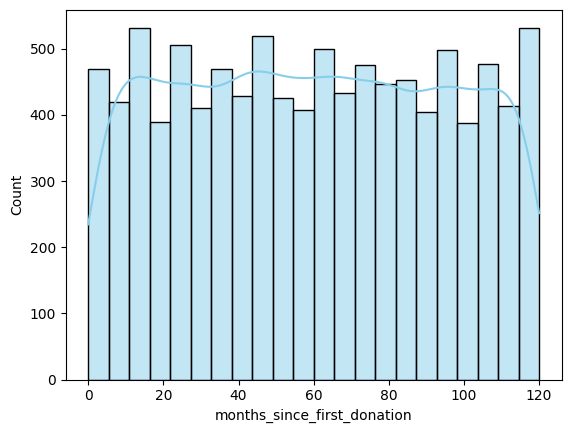

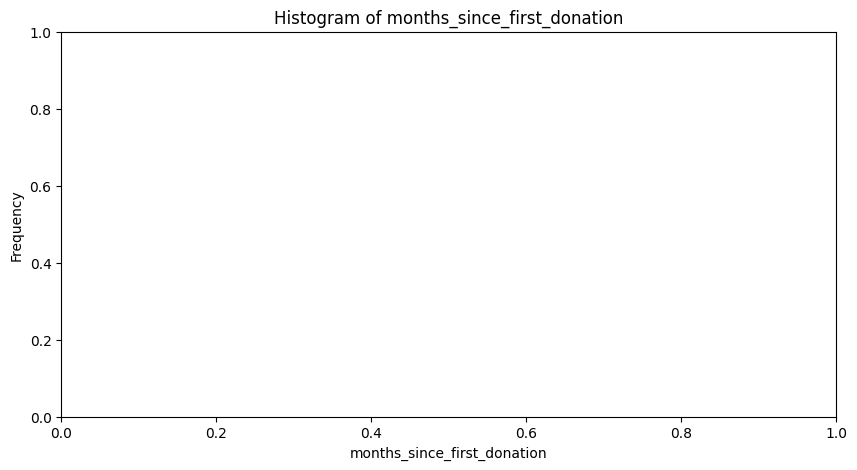

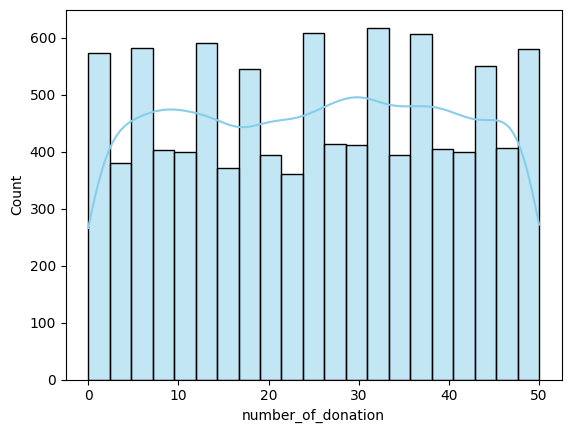

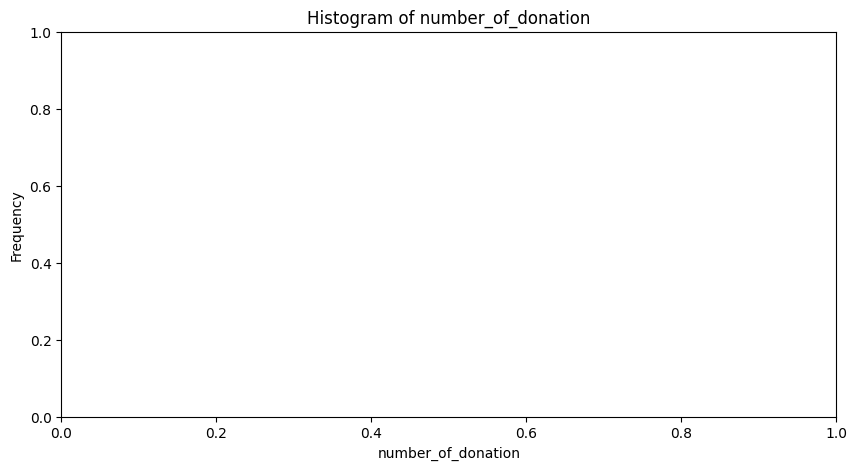

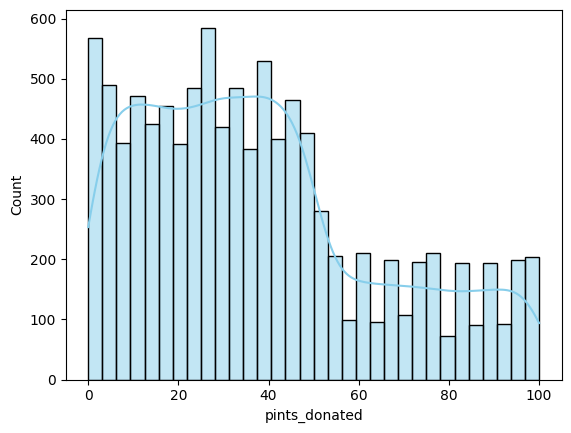

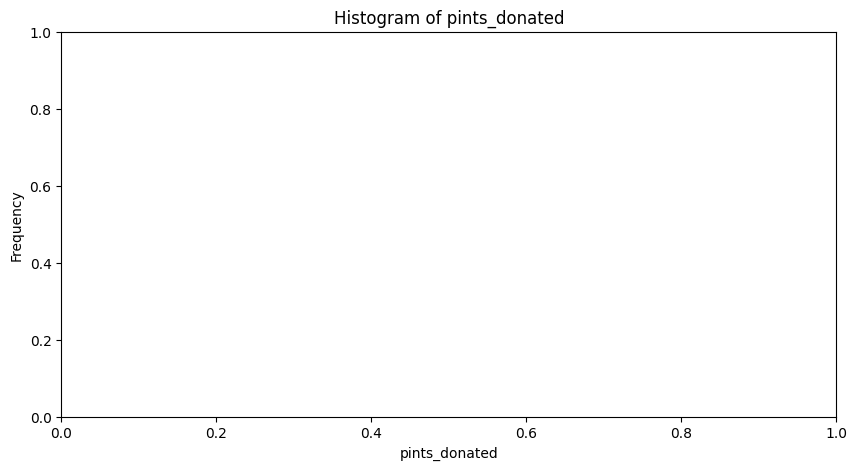

<Figure size 640x480 with 0 Axes>

In [121]:
features = ["months_since_first_donation","number_of_donation","pints_donated"]
for f in features:
    sns.histplot(df[f],kde=True, color='skyblue')
    plt.figure(figsize=(10,5))
    plt.title(f"Histogram of {f}")
    plt.xlabel(f)
    plt.ylabel("Frequency")
    plt.show()
    plt.tight_layout()